In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#load in the dataset
df_train = pd.read_csv('train.csv')


#info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
#salesprice info
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

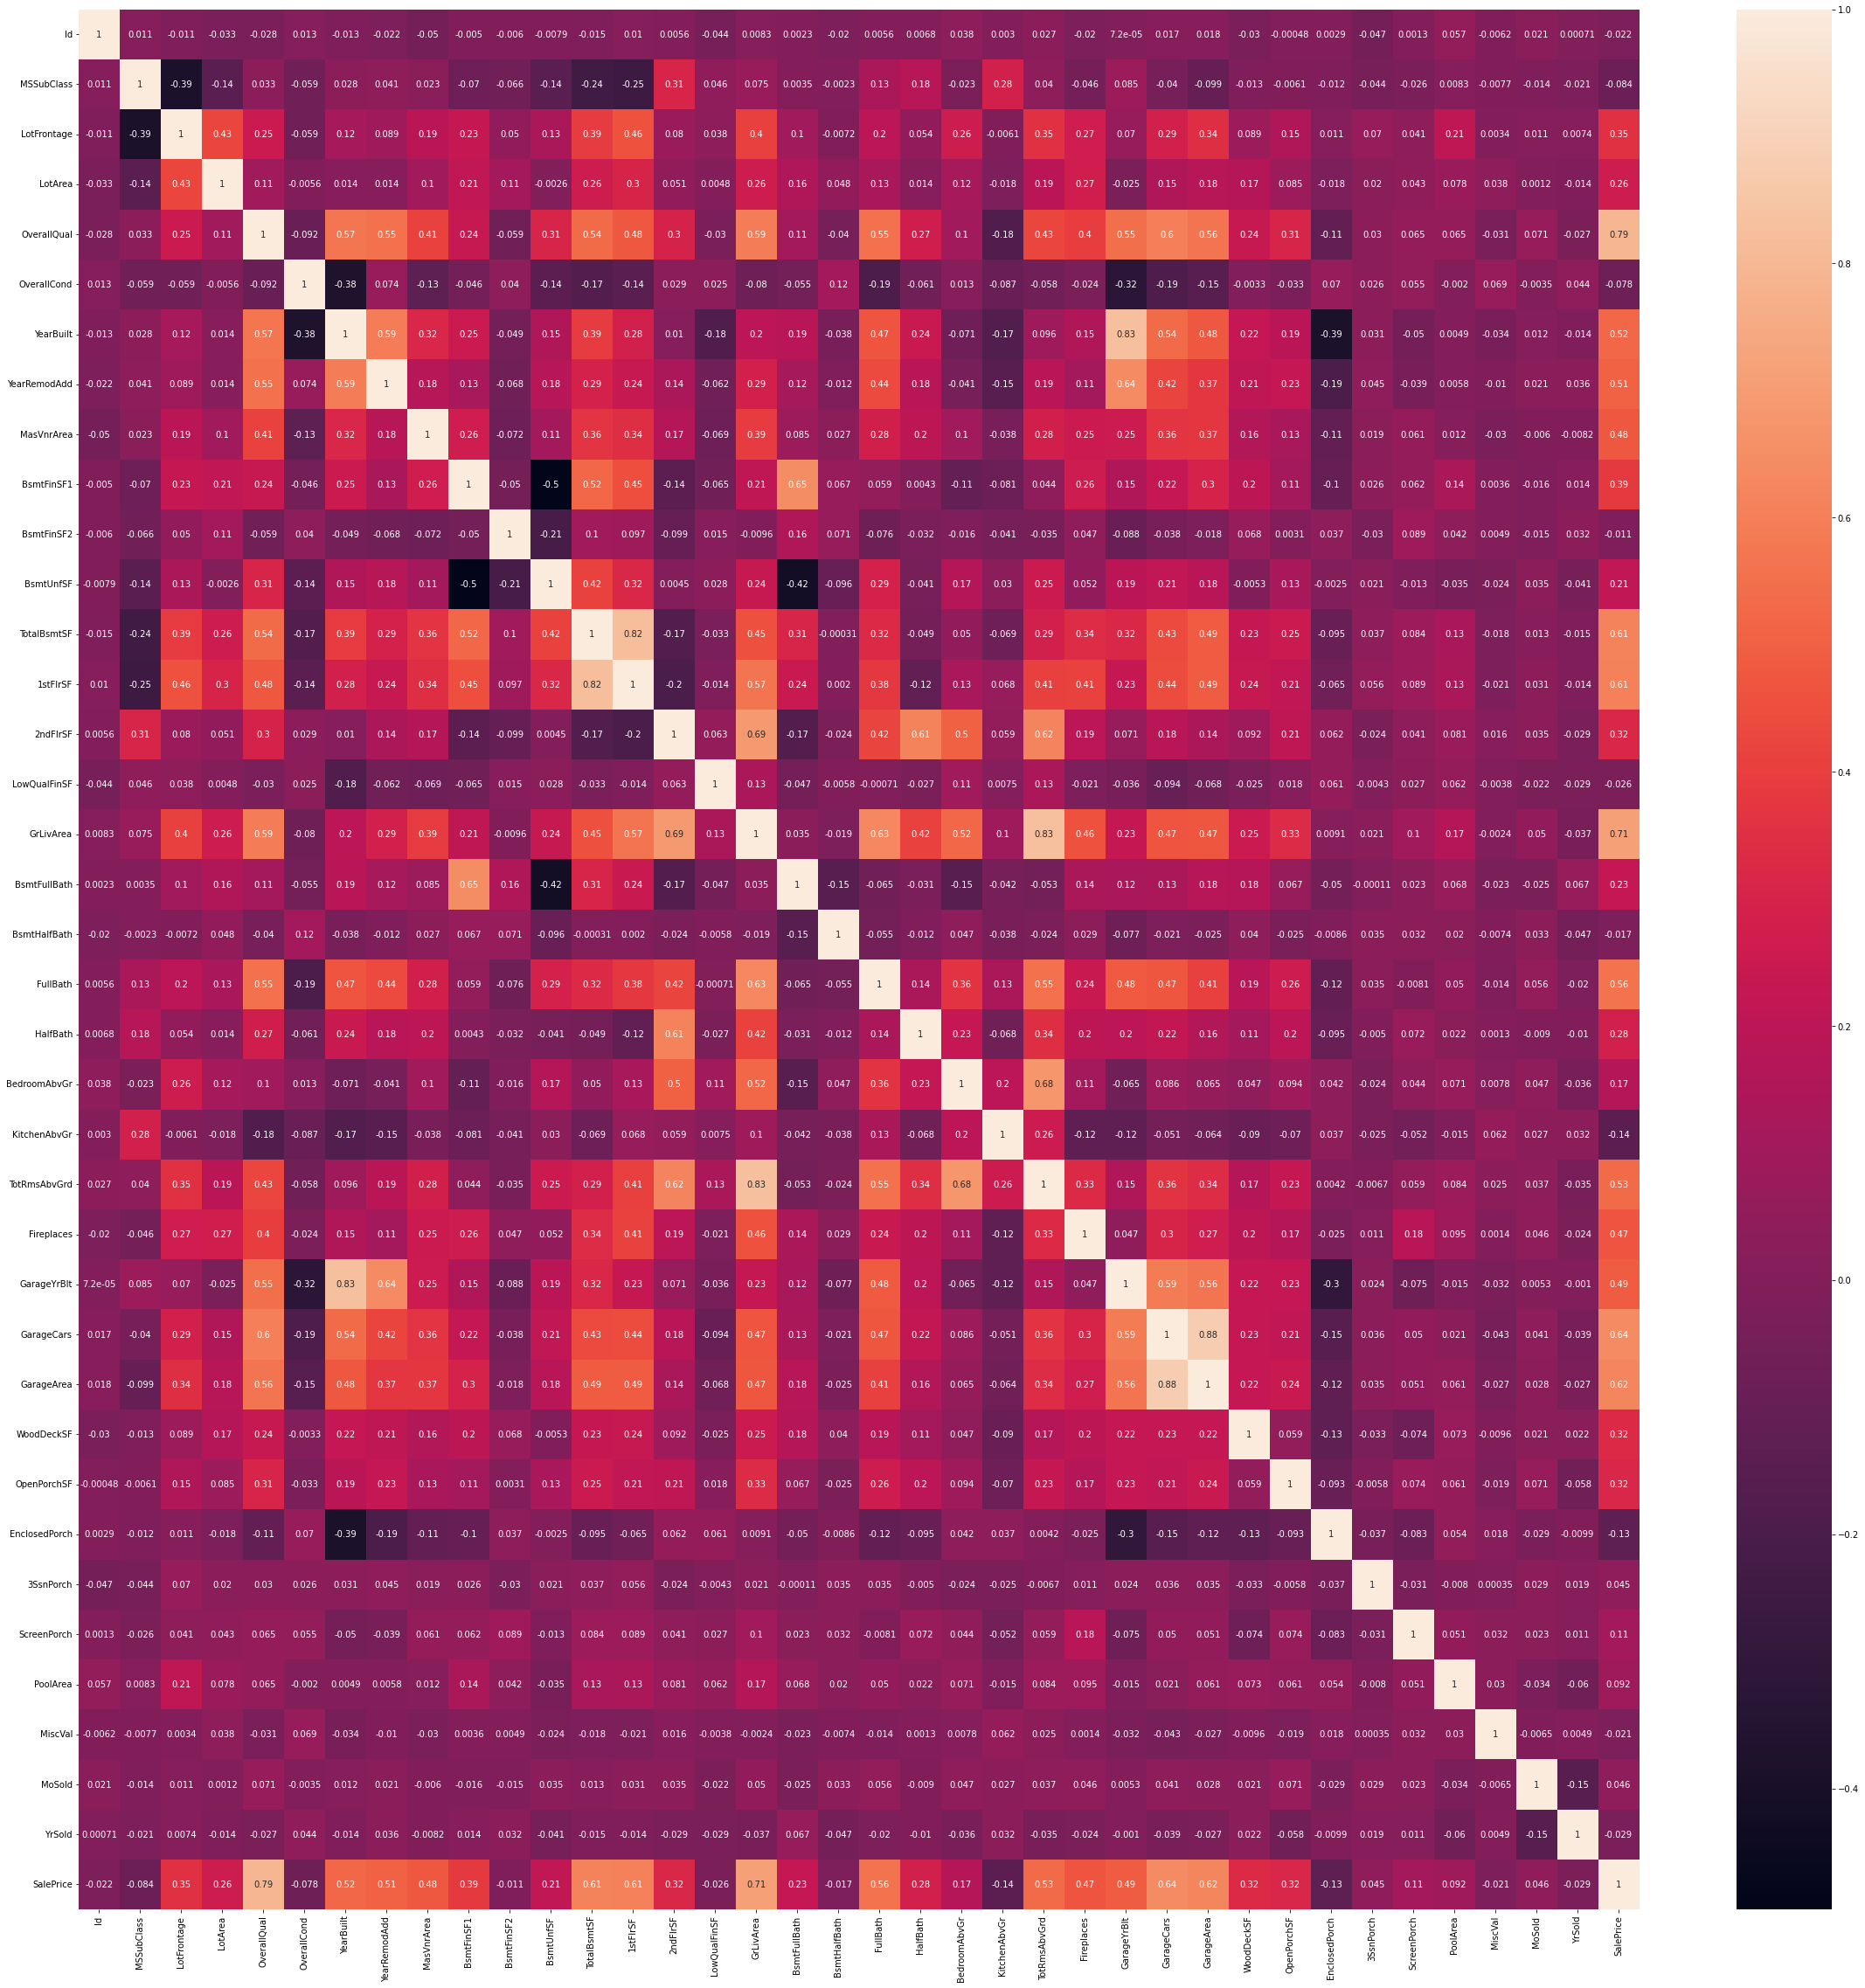

In [3]:
#broad overview of correlations
corr = df_train.corr() 
plt.figure(figsize = (40,40))
sns.heatmap(corr, annot = True)

In [4]:
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   

In [5]:
#bad or colinear variables

#drop id because it has no use
df_train.drop("Id", axis = 1, inplace = True)

#drop garage GarageYrBlt because it is redundant with year built
df_train.drop("GarageYrBlt", axis = 1, inplace = True)

#drop Garagearea because it is colinear with GarageCars
df_train.drop("GarageArea", axis = 1, inplace = True)

#drop 1stFlrSF because it is colinear with 1stFlrSF 
df_train.drop("1stFlrSF", axis = 1, inplace = True)

In [6]:
#seperate catagorical and numerical
categorical_features = df_train.select_dtypes(include = ["object"]).columns
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns

#
train_num = df_train[numerical_features]
train_cat = df_train[categorical_features]


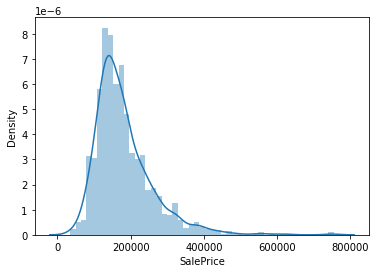

In [7]:
#not normal
sns.distplot(df_train['SalePrice']);

In [8]:
print("Skewness: %f" % df_train['SalePrice'].skew()) # how symmetric it  is: quite normal but skewed left
print("Kurtosis: %f" % df_train['SalePrice'].kurt()) #how unnormal it is, how long the tails are: long.

Skewness: 1.882876
Kurtosis: 6.536282


In [9]:
#numercal replace with median
train_num = train_num.fillna(train_num.median())

#apply log transformation to numerical
train_num = np.log1p(train_num)


#drop catagorical nulls
train_cat = train_cat.dropna()


train_cat = pd.get_dummies(train_cat)

df_train = pd.concat([train_num, train_cat], axis = 1)

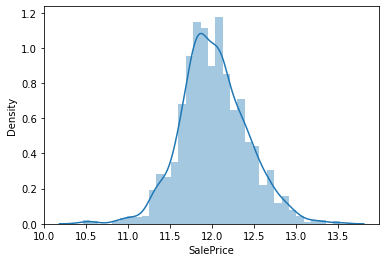

In [10]:
sns.distplot(df_train['SalePrice']);

In [11]:
print("Skewness: %f" % df_train['SalePrice'].skew()) 
print("Kurtosis: %f" % df_train['SalePrice'].kurt()) 

Skewness: 0.121347
Kurtosis: 0.809519


In [12]:
#split

y = df_train[['SalePrice']]

X = df_train.drop(columns = 'SalePrice', axis = 1)

reg = LinearRegression().fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3162)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

In [14]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     312.8
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:30:10   Log-Likelihood:                 808.02
No. Observations:                1460   AIC:                            -1548.
Df Residuals:                    1426   BIC:                            -1368.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            32.5414     43.755      0.744      0.457     -53.290     118.373
MSSubClass       -0.0123      0.008     -1.499      0.134      -0.028       0.004
LotFrontage       0.0183      0.017      1.106      0.269      -0.014       0.051
LotArea           0.0837      0.011      7.787      0.000       0.063       0.105
OverallQual       0.4838      0.032     14.989      0.000       0.420       0.547
OverallCond       0.2887      0.027     10.735      0.000       0.236       0.341
YearBuilt         5.2838      0.492     10.743      0.000       4.319       6.249
YearRemodAdd      2.6665      0.525      5.078      0.000       1.636       3.697
MasVnrArea       -0.0005      0.002     -0.293      0.769      -0.004       0.003
BsmtFinSF1        0.0086      0.002      4.766      0.000       0.005       0.012
BsmtFinSF2       -0.0048      0.002     -2.147      0.032      -0.009      -0.000
BsmtUnfSF        -0.0012      0.003     -0.408      0.684      -0.007       0.005
TotalBsmtSF       0.0121      0.005      2.457      0.014       0.002       0.022
2ndFlrSF         -0.0121      0.002     -5.483      0.000      -0.016      -0.008
LowQualFinSF     -0.0082      0.005     -1.566      0.118      -0.019       0.002
GrLivArea         0.5062      0.030     17.043      0.000       0.448       0.564
BsmtFullBath      0.0645      0.015      4.305      0.000       0.035       0.094
BsmtHalfBath      0.0062      0.024      0.252      0.801      -0.042       0.054
FullBath          0.0853      0.028      3.033      0.002       0.030       0.140
HalfBath          0.0312      0.016      1.944      0.052      -0.000       0.063
BedroomAbvGr     -0.1177      0.024     -4.871      0.000      -0.165      -0.070
KitchenAbvGr     -0.2171      0.053     -4.134      0.000      -0.320      -0.114
TotRmsAbvGrd      0.0792      0.037      2.122      0.034       0.006       0.152
Fireplaces        0.0485      0.012      4.115      0.000       0.025       0.072
GarageCars        0.1104      0.015      7.179      0.000       0.080       0.141
WoodDeckSF        0.0044      0.002      2.759      0.006       0.001       0.007
OpenPorchSF       0.0006      0.002      0.268      0.789      -0.003       0.005
EnclosedPorch     0.0038      0.002      1.532      0.126      -0.001       0.009
3SsnPorch         0.0007      0.006      0.127      0.899      -0.010       0.012
ScreenPorch       0.0094      0.003      3.409      0.001       0.004       0.015
PoolArea         -0.0187      0.009     -2.171      0.030      -0.036      -0.002
MiscVal          -0.0059      0.003     -1.939      0.053      -0.012    7.08e-05
MoSold            0.0050      0.009      0.567      0.570      -0.012       0.022
YrSold          -11.4369      5.741     -1.992      0.047     -22.699      -0.174
=================================================

In [15]:
#Experiment 3 Ridge
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
Ridge_pipe = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('Ridge', Ridge())
]).fit(X_train, y_train)

ridge_y_pred = Ridge_pipe.predict(X_test)


print(f"Ridge R^2: {r2_score(y_test, ridge_y_pred):.5f}")

Ridge R^2: 0.88080


In [16]:
#Experiment 2 PCA
from sklearn.decomposition import PCA
numerical_feats = list(df_train._get_numeric_data().columns)
dim_df = df_train[numerical_feats]

In [17]:
x = dim_df.values
x = StandardScaler().fit_transform(x)

In [18]:
pca = PCA(n_components = 3, random_state = 7) # reduce to 2 dimensions
pca_mdl = pca.fit_transform(x)

In [19]:
pca_df = pd.DataFrame(pca_mdl)
pca_df.head()

,0,1,2
0,-2.170022,-0.015273,-1.265094
1,0.054871,-1.051533,1.444379
2,-2.506067,-0.214443,-0.872329
3,0.329459,1.247657,0.977050
4,-4.460345,0.185893,-0.034527


In [20]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [21]:
pca.fit(X_train)
x_train_pca = pca.transform(X_train)
lr.fit(x_train_pca, y_train)

LinearRegression()

In [22]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     312.8
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:30:10   Log-Likelihood:                 808.02
No. Observations:                1460   AIC:                            -1548.
Df Residuals:                    1426   BIC:                            -1368.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            32.5414     43.755      0.744      0.457     -53.290     118.373
MSSubClass       -0.0123      0.008     -1.499      0.134      -0.028       0.004
LotFrontage       0.0183      0.017      1.106      0.269      -0.014       0.051
LotArea           0.0837      0.011      7.787      0.000       0.063       0.105
OverallQual       0.4838      0.032     14.989      0.000       0.420       0.547
OverallCond       0.2887      0.027     10.735      0.000       0.236       0.341
YearBuilt         5.2838      0.492     10.743      0.000       4.319       6.249
YearRemodAdd      2.6665      0.525      5.078      0.000       1.636       3.697
MasVnrArea       -0.0005      0.002     -0.293      0.769      -0.004       0.003
BsmtFinSF1        0.0086      0.002      4.766      0.000       0.005       0.012
BsmtFinSF2       -0.0048      0.002     -2.147      0.032      -0.009      -0.000
BsmtUnfSF        -0.0012      0.003     -0.408      0.684      -0.007       0.005
TotalBsmtSF       0.0121      0.005      2.457      0.014       0.002       0.022
2ndFlrSF         -0.0121      0.002     -5.483      0.000      -0.016      -0.008
LowQualFinSF     -0.0082      0.005     -1.566      0.118      -0.019       0.002
GrLivArea         0.5062      0.030     17.043      0.000       0.448       0.564
BsmtFullBath      0.0645      0.015      4.305      0.000       0.035       0.094
BsmtHalfBath      0.0062      0.024      0.252      0.801      -0.042       0.054
FullBath          0.0853      0.028      3.033      0.002       0.030       0.140
HalfBath          0.0312      0.016      1.944      0.052      -0.000       0.063
BedroomAbvGr     -0.1177      0.024     -4.871      0.000      -0.165      -0.070
KitchenAbvGr     -0.2171      0.053     -4.134      0.000      -0.320      -0.114
TotRmsAbvGrd      0.0792      0.037      2.122      0.034       0.006       0.152
Fireplaces        0.0485      0.012      4.115      0.000       0.025       0.072
GarageCars        0.1104      0.015      7.179      0.000       0.080       0.141
WoodDeckSF        0.0044      0.002      2.759      0.006       0.001       0.007
OpenPorchSF       0.0006      0.002      0.268      0.789      -0.003       0.005
EnclosedPorch     0.0038      0.002      1.532      0.126      -0.001       0.009
3SsnPorch         0.0007      0.006      0.127      0.899      -0.010       0.012
ScreenPorch       0.0094      0.003      3.409      0.001       0.004       0.015
PoolArea         -0.0187      0.009     -2.171      0.030      -0.036      -0.002
MiscVal          -0.0059      0.003     -1.939      0.053      -0.012    7.08e-05
MoSold            0.0050      0.009      0.567      0.570      -0.012       0.022
YrSold          -11.4369      5.741     -1.992      0.047     -22.699      -0.174
=================================================

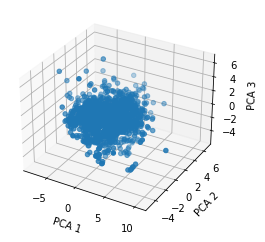

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = pca_df[0]
y = pca_df[1]
z = pca_df[2]

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.scatter(x, y, z)

plt.show()